In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [52]:
df = pd.read_csv("https://datasocibmproject.s3.ap-southeast-2.amazonaws.com/structured_data/capital_project_schedules_and_budgets_1.csv")

In [67]:
df.columns.tolist()

['project_geographic_district',
 'project_building_identifier',
 'project_school_name',
 'project_type',
 'project_description',
 'project_phase_name',
 'project_status_name',
 'project_phase_actual_start_date',
 'project_phase_planned_end_date',
 'project_phase_actual_end_date',
 'project_budget_amount',
 'final_estimate_of_actual_costs_through_end_of_phase_amount',
 'total_phase_actual_spending_amount',
 'dsf_number_s',
 'project_building_identifier_encoded',
 'project_school_name_encoded',
 'project_type_encoded',
 'project_description_encoded',
 'project_phase_name_encoded',
 'project_status_name_encoded']

In [54]:
df['dsf_number_s']

0       DSF: 0000821031, 0000822210
1       DSF: 0000821031, 0000822210
2                   DSF: 0000823560
3                   DSF: 0000823560
4                   DSF: 0000823560
                   ...             
8180                DSF: 0000851654
8181                DSF: 0000776207
8182                DSF: 0000776207
8183                DSF: 0000776207
8184                DSF: 0000776207
Name: dsf_number_s, Length: 8185, dtype: object

In [55]:
# Basic Data Inspection
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,project_geographic_district,project_building_identifier,project_school_name,project_type,project_description,project_phase_name,project_status_name,project_phase_actual_start_date,project_phase_planned_end_date,project_phase_actual_end_date,project_budget_amount,final_estimate_of_actual_costs_through_end_of_phase_amount,total_phase_actual_spending_amount,dsf_number_s
0,10,X254,I.S. 254 - BRONX,SCA CIP,FACADE/ROOFS,Construction,In-Progress,07/07/2016,03/28/2018,NaN,4050000,4229193.0,3791127.0,"DSF: 0000821031, 0000822210"
1,10,X254,I.S. 254 - BRONX,SCA CIP,FACADE/ROOFS,"CM, F&E",In-Progress,07/07/2016,03/28/2018,NaN,252000,489326.0,485620.0,"DSF: 0000821031, 0000822210"
2,10,X254,I.S. 254 - BRONX,SCA CIP RESOA,FY16 RESO A IP SURVEILLANCE CAMERA INSTALLATION,Scope,Complete,07/27/2017,11/27/2017,08/03/2017,0,1792.0,1792.0,DSF: 0000823560
3,10,X254,I.S. 254 - BRONX,SCA CIP RESOA,FY16 RESO A IP SURVEILLANCE CAMERA INSTALLATION,Design,In-Progress,08/04/2017,02/05/2018,NaN,19110,17318.0,7169.0,DSF: 0000823560
4,10,X254,I.S. 254 - BRONX,SCA CIP RESOA,FY16 RESO A IP SURVEILLANCE CAMERA INSTALLATION,Construction,PNS,PNS,PNS,PNS,280280,280280.0,951.0,DSF: 0000823560


In [56]:
# Dataset information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8185 entries, 0 to 8184
Data columns (total 14 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   project_geographic_district                                 8185 non-null   int64  
 1   project_building_identifier                                 8185 non-null   object 
 2   project_school_name                                         8185 non-null   object 
 3   project_type                                                8185 non-null   object 
 4   project_description                                         8185 non-null   object 
 5   project_phase_name                                          8184 non-null   object 
 6   project_status_name                                         8185 non-null   object 
 7   project_phase_actual_start_date                             8185 non-null   object 
 8 

In [57]:
# Summary statistics
df.describe()

,project_geographic_district,final_estimate_of_actual_costs_through_end_of_phase_amount,total_phase_actual_spending_amount
count,8185.000000,8.181000e+03,8.185000e+03
mean,17.648259,1.185590e+06,4.091091e+05
std,9.419492,6.300406e+06,3.255846e+06
min,1.000000,0.000000e+00,0.000000e+00
25%,10.000000,1.841900e+04,0.000000e+00
50%,19.000000,8.030900e+04,6.762000e+03
75%,26.000000,2.640000e+05,7.939600e+04
max,32.000000,1.150066e+08,7.934706e+07


In [58]:
# Missing Values Analysis
print(df.isnull().sum())

project_geographic_district                                      0
project_building_identifier                                      0
project_school_name                                              0
project_type                                                     0
project_description                                              0
project_phase_name                                               1
project_status_name                                              0
project_phase_actual_start_date                                  0
project_phase_planned_end_date                                   0
project_phase_actual_end_date                                 2158
project_budget_amount                                            0
final_estimate_of_actual_costs_through_end_of_phase_amount       4
total_phase_actual_spending_amount                               0
dsf_number_s                                                     0
dtype: int64


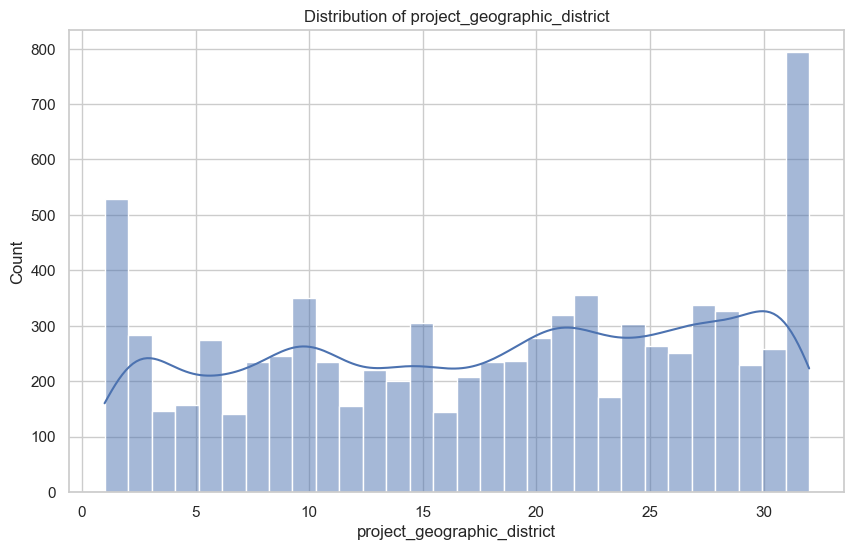

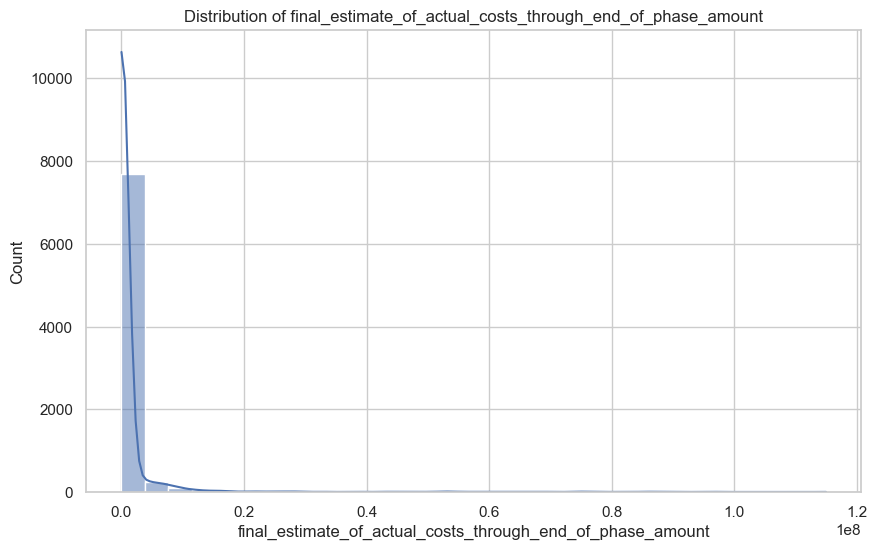

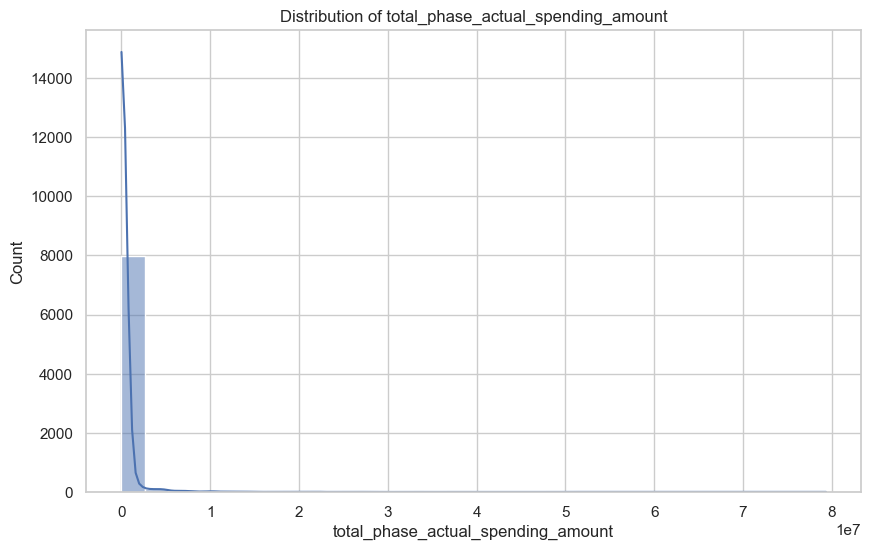

In [59]:
# Distribution of Numerical Features
numerical_features = df.select_dtypes(include=[np.number]).columns

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()


In [60]:
categorical_features = df.select_dtypes(include=[object]).columns

for col in categorical_features:
    unique_values = df[col].unique()
    num_values = len(unique_values)
    print(f'{num_values} distinct values in {col}:\n {unique_values}')

1196 distinct values in project_building_identifier:
 ['X254' 'X279' 'X283' ... 'K677' 'K799' 'K842']
1483 distinct values in project_school_name:
 ['I.S. 254 - BRONX' 'P.S. 279 - BRONX' 'I.S. 228 - BRONX' ...
 'ACAD. FOR ENVIRON. LDRSHP - K' 'P.S. 677 - BROOKLYN'
 'ALC - BROOKLYN CHOICES']
20 distinct values in project_type:
 ['SCA CIP' 'SCA CIP RESOA' 'DIIT - RESOA' 'DOE- RESOA'
 'SCA Furniture & Equi' 'Trust For Public Lan' 'SCA Capacity'
 'DOE - Skilled Trades' 'SCA IEH' 'DOE - Lead Paint' 'PRE-K'
 'DIIT - PBX Telephone' 'DIIT - Project Conne' 'Fast Track Projects'
 'DCAS/NYPA' 'SCA Lease Site Impro' 'SCA Emergency Lighti' 'RCT CIP'
 'SCA Emergency Respon' 'DOE Managed PREK']
1363 distinct values in project_description:
 ['FACADE/ROOFS' 'FY16 RESO A IP SURVEILLANCE CAMERA INSTALLATION'
 'FY17 RESO A TECHNOLOGY' ... 'EXT MASONRY/WINDOWS/PARAPETS/ROOFS'
 'REPLACE (8) UNIVENTS' 'CERTIFICATE OF OCCUPANCY']
9 distinct values in project_phase_name:
 ['Construction' 'CM, F&E' 'Scope' 'Des

In [61]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the project_building_identifier column
df['project_building_identifier_encoded'] = label_encoder.fit_transform(df['project_building_identifier'])
df['project_school_name_encoded'] = label_encoder.fit_transform(df['project_school_name'])
df['project_type_encoded'] = label_encoder.fit_transform(df['project_type'])
df['project_description_encoded'] = label_encoder.fit_transform(df['project_description'])
df['project_phase_name_encoded'] = label_encoder.fit_transform(df['project_phase_name'])
df['project_status_name_encoded'] = label_encoder.fit_transform(df['project_status_name'])


In [70]:
print(df[df['project_building_identifier_encoded'] == 1])

      project_geographic_district project_building_identifier  \
6913                           17                        K002   
6914                           17                        K002   
6915                           17                        K002   

     project_school_name          project_type  \
6913   I.S. 2 - BROOKLYN          DIIT - RESOA   
6914   I.S. 2 - BROOKLYN  DOE - Skilled Trades   
6915   I.S. 2 - BROOKLYN  DOE - Skilled Trades   

                                project_description project_phase_name  \
6913                         FY17 RESO A TECHNOLOGY    Purch & Install   
6914                         ADA SHELTER COMPLIANCE       Construction   
6915  REPLACE VACUUM CONDENSATE PUMP AND STEAM TRAP       Construction   

     project_status_name project_phase_actual_start_date  \
6913            Complete                      06/14/2017   
6914         In-Progress                      07/25/2017   
6915         In-Progress                      11/15/2016   



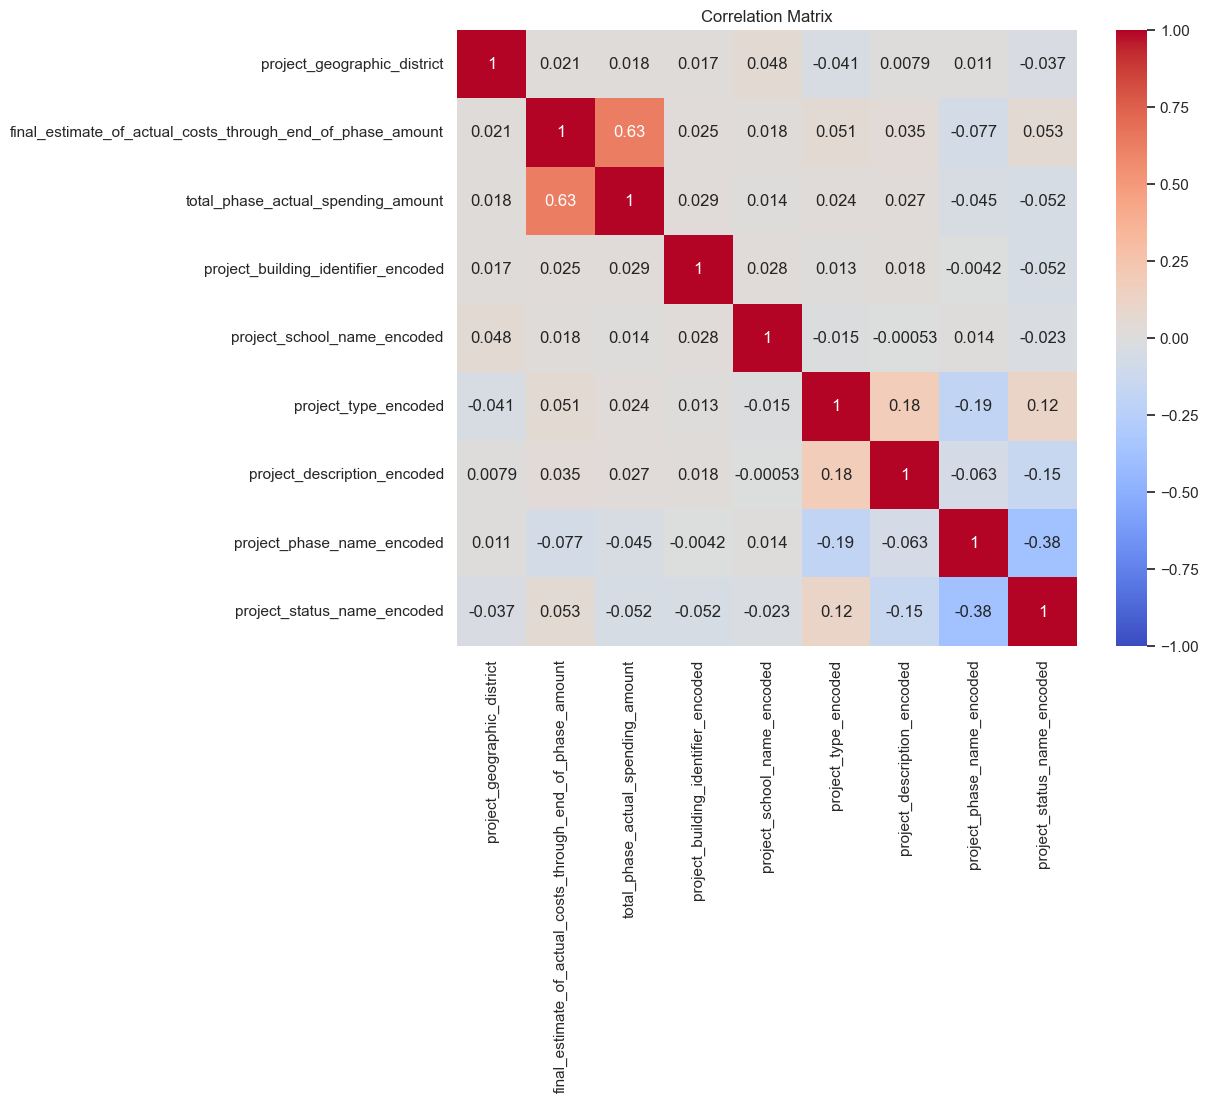

In [62]:
correlation_matrix = df[df.select_dtypes(include=[np.number]).columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

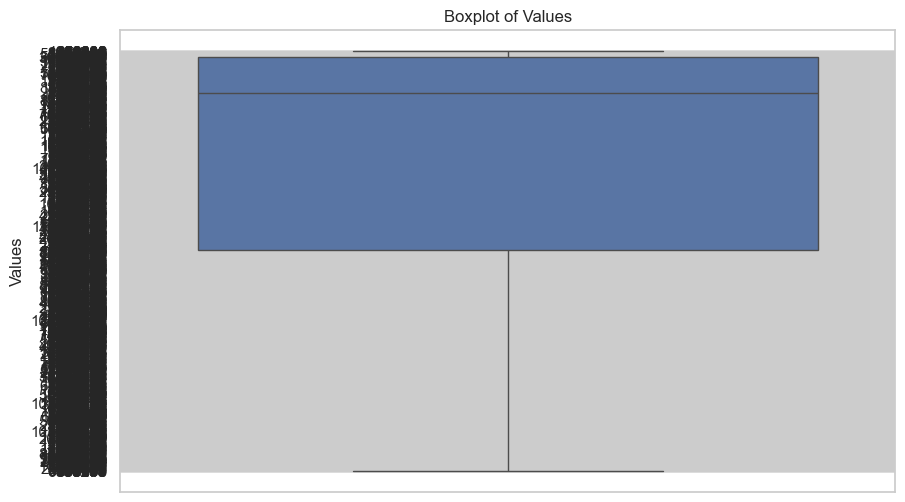

In [63]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['project_budget_amount'])

# Add title and labels
plt.title('Boxplot of Values')
plt.ylabel('Values')

# Show the plot
plt.show()
